In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
retina_df = pd.read_csv("../Data/trainLabels.csv")
retina_df.head(5)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [3]:
etiquetas_tipo = ['NO DR', 'MILD', 'MODERATE', 'SEVERE', 'PROLIFERATIVE DR']
retina_df['multi_type'] = retina_df['level'].map({
    0: 'NO DR',
    1: 'MILD',
    2: 'MODERATE',
    3: 'SEVERE',
    4: 'PROLIFERATIVE DR'
})

retina_df = retina_df[retina_df['level'] != 0]
retina_df['multi_level'] = retina_df['level']-1
retina_df.sample(5)

,image,level,multi_type,multi_level
6006,7580_left,1,MILD,0
32118,40557_left,1,MILD,0
14457,18133_right,2,MODERATE,1
31650,39978_left,1,MILD,0
6288,7905_left,2,MODERATE,1


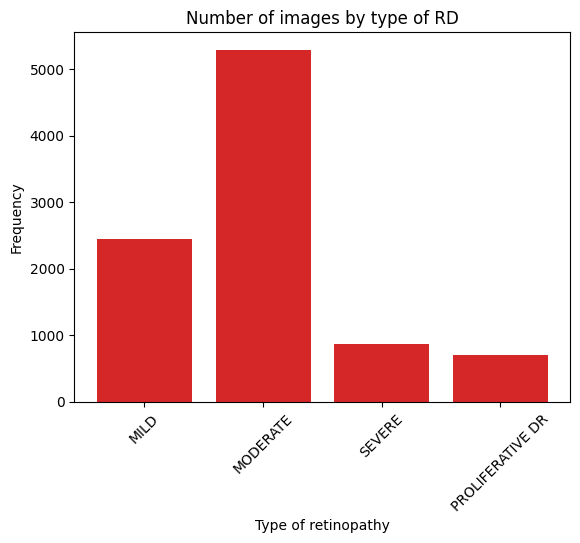

In [4]:
counts = retina_df['multi_type'].value_counts().reindex(etiquetas_tipo)
plt.bar(counts.index, counts.values, color='tab:red')
plt.title("Number of images by type of RD")
plt.xticks(rotation=45)
plt.xlabel("Type of retinopathy")
plt.ylabel("Frequency")
plt.show()

In [5]:
min_clases = counts.min()
clase = counts.idxmin()
print(f"La clase con menos imágenes es '{clase}' con {min_clases} imágenes.")

La clase con menos imágenes es 'PROLIFERATIVE DR' con 708.0 imágenes.


In [6]:
retina_df_bal = retina_df.groupby(['multi_type'])[['image','level','multi_type','multi_level']].apply(lambda x: x.sample(700, replace=False, random_state=42)).reset_index(drop=True)
retina_df_bal = retina_df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

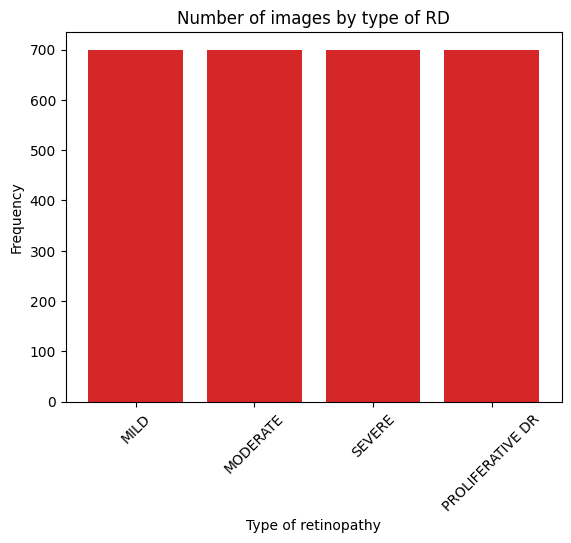

In [7]:
counts = retina_df_bal['multi_type'].value_counts().reindex(etiquetas_tipo)
plt.bar(counts.index, counts.values, color='tab:red')
plt.title("Number of images by type of RD")
plt.xticks(rotation=45)
plt.xlabel("Type of retinopathy")
plt.ylabel("Frequency")
plt.show()

In [8]:
counts

multi_type
NO DR                 NaN
MILD                700.0
MODERATE            700.0
SEVERE              700.0
PROLIFERATIVE DR    700.0
Name: count, dtype: float64

In [9]:
retina_df_bal.to_csv('../Data/Retina_DF_BalType_Multi_700_FiveCLass.csv', index=False)